In [82]:
# lib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.utils import load_img, img_to_array

In [3]:
train_path = '../datasets/Flowers/train/'
test_path = '../datasets/Flowers/test/'

In [4]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1/255.0,
)

test_datagen = ImageDataGenerator(
    rescale=1/255.0
)

In [5]:
train_dataset = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

test_dataset = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
)

Found 3250 images belonging to 5 classes.
Found 530 images belonging to 5 classes.


In [12]:
# load model

base_model = MobileNet(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

for layer in base_model.layers:
    layer.trainable = False

In [47]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', input_shape=(224,224,3))(x)
prediction=Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=prediction)

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
)

model.fit(
    train_dataset,
    steps_per_epoch=len(train_dataset),
    epochs=10,
    validation_data=(test_dataset),
    validation_steps=(len(test_dataset)),
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/10
102/102 [==============================] - 36s 334ms/step - loss: 0.6541 - accuracy: 0.7797 - val_loss: 0.3151 - val_accuracy: 0.8925
Epoch 2/10
102/102 [==============================] - 29s 288ms/step - loss: 0.3173 - accuracy: 0.8846 - val_loss: 0.2948 - val_accuracy: 0.9019
Epoch 3/10
102/102 [==============================] - 29s 285ms/step - loss: 0.2764 - accuracy: 0.9037 - val_loss: 0.3683 - val_accuracy: 0.8830
Epoch 4/10
102/102 [==============================] - 30s 291ms/step - loss: 0.2192 - accuracy: 0.9209 - val_loss: 0.3264 - val_accuracy: 0.8981
Epoch 5/10
102/102 [==============================] - 29s 287ms/step - loss: 0.1920 - accuracy: 0.9277 - val_loss: 0.2981 - val_accuracy: 0.9019
Epoch 6/10
102/102 [==============================] - 31s 302ms/step - loss: 0.1572 - accuracy: 0.9391 - val_loss: 0.2634 - val_accuracy: 0.9075
Epoch 7/10
102/102 [==============================] - 29s 284ms/step - loss: 0.1503 - accuracy: 0.9486 - val_loss: 0.2339 - val_ac

In [50]:
model.evaluate(test_dataset)

17/17 [==============================] - 2s 80ms/step - loss: 0.2681 - accuracy: 0.9245


[0.2681303024291992, 0.9245283007621765]

In [89]:
def load_img_processor(image_path):
    image = load_img(image_path, target_size=(224,224))
    image_arr = img_to_array(image)
    image_arr = image_arr / 255.0
    image_arr = image_arr.reshape(1,224,224,3)
    return image_arr

class_labels = list(train_dataset.class_indices.keys())

def predict_display(image_path):
    process_image = load_img_processor(image_path)
    
    prediction = model.predict(process_image)
    prediction_class = np.argmax(prediction)

    print(f'prediction : {class_labels[prediction_class]}')

    plt.imshow(load_img(image_path,target_size=(224,224)))
    plt.axis('off')

1/1 [==============================] - 0s 26ms/step
prediction : tulips


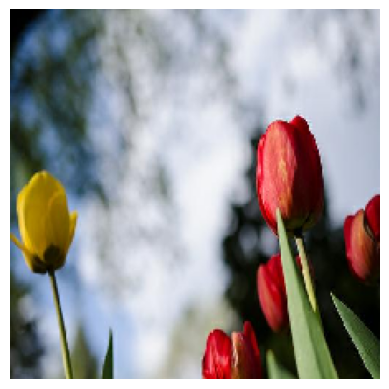

In [98]:
# image = '../datasets/Flowers/test/roses/roses_113.jpg'
# image = '../datasets/Flowers/test/dandelion/dandelion_105.jpg'
# image = '../datasets/Flowers/test/daisy/daisy_121.jpg'
# image = '../datasets/Flowers/test/sunflowers/sunflowers_107.jpg'
image = '../datasets/Flowers/test/tulips/tulips_123.jpg'
predict_display(image)

In [99]:
print(test_dataset.class_indices)

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}
